In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
import os
path=os.getcwd()
os.chdir(path)
file_policy = "consider_brand.csv"
df_policy = pd.read_csv(file_policy)
pd.set_option('display.max_columns', None)
display(df_policy.head())

,policy_id,carno,avvage,avage,avsr,aved,avage_decision,avsr_decision,aved_decision,Quote_dt,discount,Home_policy_ind,zip,state_id,county_name,Agent_cd,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,primary_parking,c_bmw,c_audi,c_cadillac,c_benz,c_acura,c_honda,c_chevolet,c_toyota,c_nissan,c_ford,c_gmc,c_mazda,c_dodge,c_chrysler,c_saturn,c_buick,c_smart,c_subaru,c_ram
0,policy_1055,2,4.00,58.0,84.0,1.0,58.0,84.0,1.0,2017-05-04,Yes,Y,35816,AL,Madison,73219582,"$13,859",Carrier_3,491,High,5,2,1,1,0,2,0.0,Train,unknown,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,policy_1079,2,2.00,57.0,79.0,1.0,57.0,79.0,1.0,2015-08-25,No,N,35205,AL,Jefferson,77662062,"$9,406",Carrier_6,516,Low,1,1,0,2,0,2,0.0,Train,unknown,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,policy_10097,4,5.75,37.0,73.0,1.0,37.0,73.0,1.0,2015-05-14,No,N,33322,FL,Broward,63155143,"$5,853",Carrier_5,621,High,4,1,0,2,1,3,0.0,Train,unknown,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,policy_11050,2,4.00,72.0,74.0,1.0,72.0,74.0,1.0,2015-12-31,No,N,33143,FL,Miami-Dade,19952087,$892,Carrier_2,765,Low,1,1,1,2,1,4,1.0,Train,unknown,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,policy_10526,2,4.00,51.0,81.0,1.0,51.0,81.0,1.0,2018-01-13,Yes,Y,33136,FL,Miami-Dade,33263469,"$1,232",Carrier_5,765,Medium,3,1,3,3,0,6,1.0,Train,home/driveway,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [3]:
df_policy.isnull().sum()

policy_id                0
carno                    0
avvage                   0
avage                    0
avsr                     0
aved                     0
avage_decision           0
avsr_decision            0
aved_decision            0
Quote_dt                 0
discount                 0
Home_policy_ind          0
zip                      0
state_id                 0
county_name              0
Agent_cd                 0
quoted_amt             106
Prior_carrier_grp     4780
credit_score             0
Cov_package_type       736
CAT_zone                 0
number_drivers           0
num_loaned_veh           0
num_owned_veh            0
num_leased_veh           0
total_number_veh         0
convert_ind          11685
split                    0
primary_parking          0
c_bmw                    0
c_audi                   0
c_cadillac               0
c_benz                   0
c_acura                  0
c_honda                  0
c_chevolet               0
c_toyota                 0
c

In [4]:
if df_policy.shape[0] == df_policy.drop_duplicates().shape[0]:
    print('The dataset has no duplicate rows.\nNumber of examples:', df_policy.shape[0])

The dataset has no duplicate rows.
Number of examples: 46828


In [5]:
# keep year and month info
df_policy['Quote_dt'] = pd.to_datetime(df_policy['Quote_dt'])
df_policy['month'] = df_policy['Quote_dt'].dt.month
df_policy['year'] = df_policy['Quote_dt'].dt.year
display(df_policy.head())

,policy_id,carno,avvage,avage,avsr,aved,avage_decision,avsr_decision,aved_decision,Quote_dt,discount,Home_policy_ind,zip,state_id,county_name,Agent_cd,quoted_amt,Prior_carrier_grp,credit_score,Cov_package_type,CAT_zone,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,total_number_veh,convert_ind,split,primary_parking,c_bmw,c_audi,c_cadillac,c_benz,c_acura,c_honda,c_chevolet,c_toyota,c_nissan,c_ford,c_gmc,c_mazda,c_dodge,c_chrysler,c_saturn,c_buick,c_smart,c_subaru,c_ram,month,year
0,policy_1055,2,4.00,58.0,84.0,1.0,58.0,84.0,1.0,2017-05-04,Yes,Y,35816,AL,Madison,73219582,"$13,859",Carrier_3,491,High,5,2,1,1,0,2,0.0,Train,unknown,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,5,2017
1,policy_1079,2,2.00,57.0,79.0,1.0,57.0,79.0,1.0,2015-08-25,No,N,35205,AL,Jefferson,77662062,"$9,406",Carrier_6,516,Low,1,1,0,2,0,2,0.0,Train,unknown,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,8,2015
2,policy_10097,4,5.75,37.0,73.0,1.0,37.0,73.0,1.0,2015-05-14,No,N,33322,FL,Broward,63155143,"$5,853",Carrier_5,621,High,4,1,0,2,1,3,0.0,Train,unknown,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2015
3,policy_11050,2,4.00,72.0,74.0,1.0,72.0,74.0,1.0,2015-12-31,No,N,33143,FL,Miami-Dade,19952087,$892,Carrier_2,765,Low,1,1,1,2,1,4,1.0,Train,unknown,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,2015
4,policy_10526,2,4.00,51.0,81.0,1.0,51.0,81.0,1.0,2018-01-13,Yes,Y,33136,FL,Miami-Dade,33263469,"$1,232",Carrier_5,765,Medium,3,1,3,3,0,6,1.0,Train,home/driveway,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2018


In [6]:
features = list(df_policy)
# arbitrary drop (primary parking,county_name,... be caustious)
features_drop = ['Agent_cd','Prior_carrier_grp','Quote_dt','zip']
# multicilinearity drop
features_drop.append('total_number_veh')
features_select = [i for i in features if (i in features_drop) == False]
print(len(features_select),features_select)

45 ['policy_id', 'carno', 'avvage', 'avage', 'avsr', 'aved', 'avage_decision', 'avsr_decision', 'aved_decision', 'discount', 'Home_policy_ind', 'state_id', 'county_name', 'quoted_amt', 'credit_score', 'Cov_package_type', 'CAT_zone', 'number_drivers', 'num_loaned_veh', 'num_owned_veh', 'num_leased_veh', 'convert_ind', 'split', 'primary_parking', 'c_bmw', 'c_audi', 'c_cadillac', 'c_benz', 'c_acura', 'c_honda', 'c_chevolet', 'c_toyota', 'c_nissan', 'c_ford', 'c_gmc', 'c_mazda', 'c_dodge', 'c_chrysler', 'c_saturn', 'c_buick', 'c_smart', 'c_subaru', 'c_ram', 'month', 'year']


In [7]:
# check data types
display(df_policy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46828 entries, 0 to 46827
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   policy_id          46828 non-null  object        
 1   carno              46828 non-null  int64         
 2   avvage             46828 non-null  float64       
 3   avage              46828 non-null  float64       
 4   avsr               46828 non-null  float64       
 5   aved               46828 non-null  float64       
 6   avage_decision     46828 non-null  float64       
 7   avsr_decision      46828 non-null  float64       
 8   aved_decision      46828 non-null  float64       
 9   Quote_dt           46828 non-null  datetime64[ns]
 10  discount           46828 non-null  object        
 11  Home_policy_ind    46828 non-null  object        
 12  zip                46828 non-null  int64         
 13  state_id           46828 non-null  object        
 14  county

None

In [8]:
df = df_policy[features_select]
display(df.head())

,policy_id,carno,avvage,avage,avsr,aved,avage_decision,avsr_decision,aved_decision,discount,Home_policy_ind,state_id,county_name,quoted_amt,credit_score,Cov_package_type,CAT_zone,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,convert_ind,split,primary_parking,c_bmw,c_audi,c_cadillac,c_benz,c_acura,c_honda,c_chevolet,c_toyota,c_nissan,c_ford,c_gmc,c_mazda,c_dodge,c_chrysler,c_saturn,c_buick,c_smart,c_subaru,c_ram,month,year
0,policy_1055,2,4.00,58.0,84.0,1.0,58.0,84.0,1.0,Yes,Y,AL,Madison,"$13,859",491,High,5,2,1,1,0,0.0,Train,unknown,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,5,2017
1,policy_1079,2,2.00,57.0,79.0,1.0,57.0,79.0,1.0,No,N,AL,Jefferson,"$9,406",516,Low,1,1,0,2,0,0.0,Train,unknown,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,8,2015
2,policy_10097,4,5.75,37.0,73.0,1.0,37.0,73.0,1.0,No,N,FL,Broward,"$5,853",621,High,4,1,0,2,1,0.0,Train,unknown,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2015
3,policy_11050,2,4.00,72.0,74.0,1.0,72.0,74.0,1.0,No,N,FL,Miami-Dade,$892,765,Low,1,1,1,2,1,1.0,Train,unknown,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,2015
4,policy_10526,2,4.00,51.0,81.0,1.0,51.0,81.0,1.0,Yes,Y,FL,Miami-Dade,"$1,232",765,Medium,3,1,3,3,0,1.0,Train,home/driveway,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2018


In [9]:
# check data types
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46828 entries, 0 to 46827
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   policy_id         46828 non-null  object 
 1   carno             46828 non-null  int64  
 2   avvage            46828 non-null  float64
 3   avage             46828 non-null  float64
 4   avsr              46828 non-null  float64
 5   aved              46828 non-null  float64
 6   avage_decision    46828 non-null  float64
 7   avsr_decision     46828 non-null  float64
 8   aved_decision     46828 non-null  float64
 9   discount          46828 non-null  object 
 10  Home_policy_ind   46828 non-null  object 
 11  state_id          46828 non-null  object 
 12  county_name       46828 non-null  object 
 13  quoted_amt        46722 non-null  object 
 14  credit_score      46828 non-null  int64  
 15  Cov_package_type  46092 non-null  object 
 16  CAT_zone          46828 non-null  int64 

None

In [10]:
dfTrain = df[df['split']=='Train']
dfTest = df[df['split']=='Test']

In [11]:
# dfTrain['discount']=(dfTrain['discount']=='Yes').astype(float)
# dfTrain['Home_policy_ind']=(dfTrain['Home_policy_ind']=='Y').astype(float)
dfTrain['quoted_amt'] = dfTrain['quoted_amt'].str.replace(",","").str.replace("$","").astype(float)
dfTrain['avg_quoted_amt'] = dfTrain['quoted_amt']/dfTrain['number_drivers']
# dfTrain['Cov_package_type'][dfTrain['Cov_package_type']=='Low']=0
# dfTrain['Cov_package_type'][dfTrain['Cov_package_type']=='Medium']=1
# dfTrain['Cov_package_type'][dfTrain['Cov_package_type']=='High']=2
# dfTrain['Cov_package_type']=dfTrain['Cov_package_type'].astype(float)
# dfTrain = pd.get_dummies(dfTrain, drop_first=False)

/var/folders/j2/n7f3dd651yv2ctvbs_t1ng6m0000gn/T/ipykernel_97054/3365348633.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfTrain['quoted_amt'] = dfTrain['quoted_amt'].str.replace(",","").str.replace("$","").astype(float)
/var/folders/j2/n7f3dd651yv2ctvbs_t1ng6m0000gn/T/ipykernel_97054/3365348633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain['quoted_amt'] = dfTrain['quoted_amt'].str.replace(",","").str.replace("$","").astype(float)
/var/folders/j2/n7f3dd651yv2ctvbs_t1ng6m0000gn/T/ipykernel_97054/3365348633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

In [12]:
display(dfTrain.head())

,policy_id,carno,avvage,avage,avsr,aved,avage_decision,avsr_decision,aved_decision,discount,Home_policy_ind,state_id,county_name,quoted_amt,credit_score,Cov_package_type,CAT_zone,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,convert_ind,split,primary_parking,c_bmw,c_audi,c_cadillac,c_benz,c_acura,c_honda,c_chevolet,c_toyota,c_nissan,c_ford,c_gmc,c_mazda,c_dodge,c_chrysler,c_saturn,c_buick,c_smart,c_subaru,c_ram,month,year,avg_quoted_amt
0,policy_1055,2,4.00,58.0,84.0,1.0,58.0,84.0,1.0,Yes,Y,AL,Madison,13859.0,491,High,5,2,1,1,0,0.0,Train,unknown,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,5,2017,6929.5
1,policy_1079,2,2.00,57.0,79.0,1.0,57.0,79.0,1.0,No,N,AL,Jefferson,9406.0,516,Low,1,1,0,2,0,0.0,Train,unknown,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,8,2015,9406.0
2,policy_10097,4,5.75,37.0,73.0,1.0,37.0,73.0,1.0,No,N,FL,Broward,5853.0,621,High,4,1,0,2,1,0.0,Train,unknown,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2015,5853.0
3,policy_11050,2,4.00,72.0,74.0,1.0,72.0,74.0,1.0,No,N,FL,Miami-Dade,892.0,765,Low,1,1,1,2,1,1.0,Train,unknown,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,2015,892.0
4,policy_10526,2,4.00,51.0,81.0,1.0,51.0,81.0,1.0,Yes,Y,FL,Miami-Dade,1232.0,765,Medium,3,1,3,3,0,1.0,Train,home/driveway,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2018,1232.0


In [13]:
# drop missing values
dfTrain.isnull().sum()
dfTrain = dfTrain.dropna()

In [43]:
dfTrain.loc[:,'discount']

0        Yes
1         No
2         No
3         No
4        Yes
        ... 
46819    Yes
46820    Yes
46821     No
46823     No
46824     No
Name: discount, Length: 34498, dtype: object

In [45]:
pd.Series(np.where(dfTrain.discount == 'Yes', 1, 0),
          dfTrain.index)

0        1
1        0
2        0
3        0
4        1
        ..
46819    1
46820    1
46821    0
46823    0
46824    0
Length: 34498, dtype: int64

,carno,avvage,avage,avsr,aved,avage_decision,avsr_decision,aved_decision,quoted_amt,credit_score,CAT_zone,number_drivers,num_loaned_veh,num_owned_veh,num_leased_veh,convert_ind,c_bmw,c_audi,c_cadillac,c_benz,c_acura,c_honda,c_chevolet,c_toyota,c_nissan,c_ford,c_gmc,c_mazda,c_dodge,c_chrysler,c_saturn,c_buick,c_smart,c_subaru,c_ram,month,year,avg_quoted_amt
carno,1.000000,-0.009670,0.042263,0.017160,0.025907,0.001711,0.001950,-0.002174,0.007516,-0.002805,0.009140,-0.061487,0.000277,-0.006063,-0.007545,0.000839,0.227369,0.159080,0.098611,0.216650,0.104903,0.262742,0.212156,0.141895,0.150606,0.202236,0.154394,0.105749,0.139472,0.085870,0.096427,0.084075,0.030711,0.079439,0.047868,0.010315,-0.014469,0.029143
avvage,-0.009670,1.000000,0.001080,0.007187,-0.000407,0.005042,0.006365,0.000547,0.004003,0.003541,0.007551,0.000433,-0.000434,0.004770,0.001252,-0.016207,0.000708,-0.000172,-0.002478,-0.004640,0.003464,-0.006817,0.000843,0.000136,-0.002758,-0.000079,-0.004606,-0.009150,-0.001585,0.002159,0.002353,0.002579,-0.008594,-0.002332,0.007221,-0.002210,0.004176,0.004957
avage,0.042263,0.001080,1.000000,0.185540,0.300270,0.662680,0.000955,-0.025697,0.009546,-0.008379,0.005712,-0.599733,0.001256,0.002722,-0.002116,0.029734,0.013900,0.002829,0.000443,0.018480,-0.002138,0.006172,0.002979,0.003179,0.003651,0.010574,0.009166,0.018321,0.010689,0.000133,0.004805,-0.005080,-0.004776,-0.008384,0.002709,0.002637,-0.010236,0.200186
avsr,0.017160,0.007187,0.185540,1.000000,0.107291,0.015172,0.835348,-0.000626,0.012161,-0.006912,-0.003238,-0.204155,0.004478,-0.001171,0.005759,0.015213,0.003602,0.009799,-0.002485,0.010996,0.000564,0.001690,0.002168,-0.003803,0.001477,0.006086,0.004316,0.002332,-0.004765,0.000701,-0.005137,0.006888,-0.003226,-0.005198,0.006280,0.001398,-0.005213,0.078777
aved,0.025907,-0.000407,0.300270,0.107291,1.000000,0.025131,0.006044,0.832365,0.020979,-0.020813,0.009675,-0.315905,0.000261,-0.005950,-0.002297,0.075371,0.004181,0.009005,0.011234,0.014931,0.004641,0.006824,0.002363,0.000043,-0.002760,0.002039,0.000288,0.006832,0.005602,-0.009436,0.004643,-0.003846,-0.001946,-0.003515,0.003276,0.008234,-0.087437,0.121843
avage_decision,0.001711,0.005042,0.662680,0.015172,0.025131,1.000000,0.006360,0.004565,0.000121,0.001140,-0.004537,-0.030118,0.002274,0.006545,-0.006483,-0.022782,-0.000558,-0.007302,-0.001972,0.001797,-0.004526,0.002188,-0.006437,-0.004535,0.011557,0.001182,0.007844,0.014746,0.000865,0.003705,0.002866,-0.003263,-0.010706,-0.010248,0.000584,-0.002722,0.003456,0.005988
avsr_decision,0.001950,0.006365,0.000955,0.835348,0.006044,0.006360,1.000000,0.005889,0.003637,-0.001869,-0.008309,-0.003165,0.004748,0.001077,0.007292,0.001881,0.000280,0.007565,-0.003232,0.001954,0.002479,-0.001018,0.005490,-0.007359,0.000266,0.000568,0.004129,-0.002831,-0.007712,0.003952,-0.007713,0.006993,-0.003192,-0.006395,0.000860,-0.002927,-0.003085,0.006918
aved_decision,-0.002174,0.000547,-0.025697,-0.000626,0.832365,0.004565,0.005889,1.000000,0.012389,-0.014200,0.002160,0.036598,0.000625,-0.003813,-0.005256,0.038650,-0.003087,0.002089,0.011190,0.003666,0.004615,0.001806,-0.005835,-0.003033,-0.001472,-0.004298,-0.003895,0.003274,0.000292,-0.007220,0.002733,-0.003243,-0.000412,-0.001752,0.000637,0.005776,-0.074282,-0.000988
quoted_amt,0.007516,0.004003,0.009546,0.012161,0.020979,0.000121,0.003637,0.012389,1.000000,-0.468147,0.194840,-0.016462,0.001424,0.004789,0.004537,-0.076781,0.006860,-0.000247,0.003318,0.000293,0.004712,0.004759,0.006726,-0.004233,0.003601,-0.000506,-0.000987,-0.001658,-0.001260,-0.003715,-0.008127,0.003145,-0.006319,-0.007664,-0.007450,-0.010636,-0.018030,0.838165
credit_score,-0.002805,0.003541,-0.008379,-0.006912,-0.020813,0.001140,-0.001869,-0.014200,-0.468147,1.000000,-0.204708,0.009286,0.013481,-0.005800,-0.000168,0.057250,-0.001541,-0.002202,0.000197,-0.000734,-0.001195,-0.002680,-0.005226,0.006234,-0.004638,-0.003843,0.000336,0.005706,0.004928,0.001242,0.001869,-0.007597,0.003828,0.010703,0.009381,0.002560,0.023522

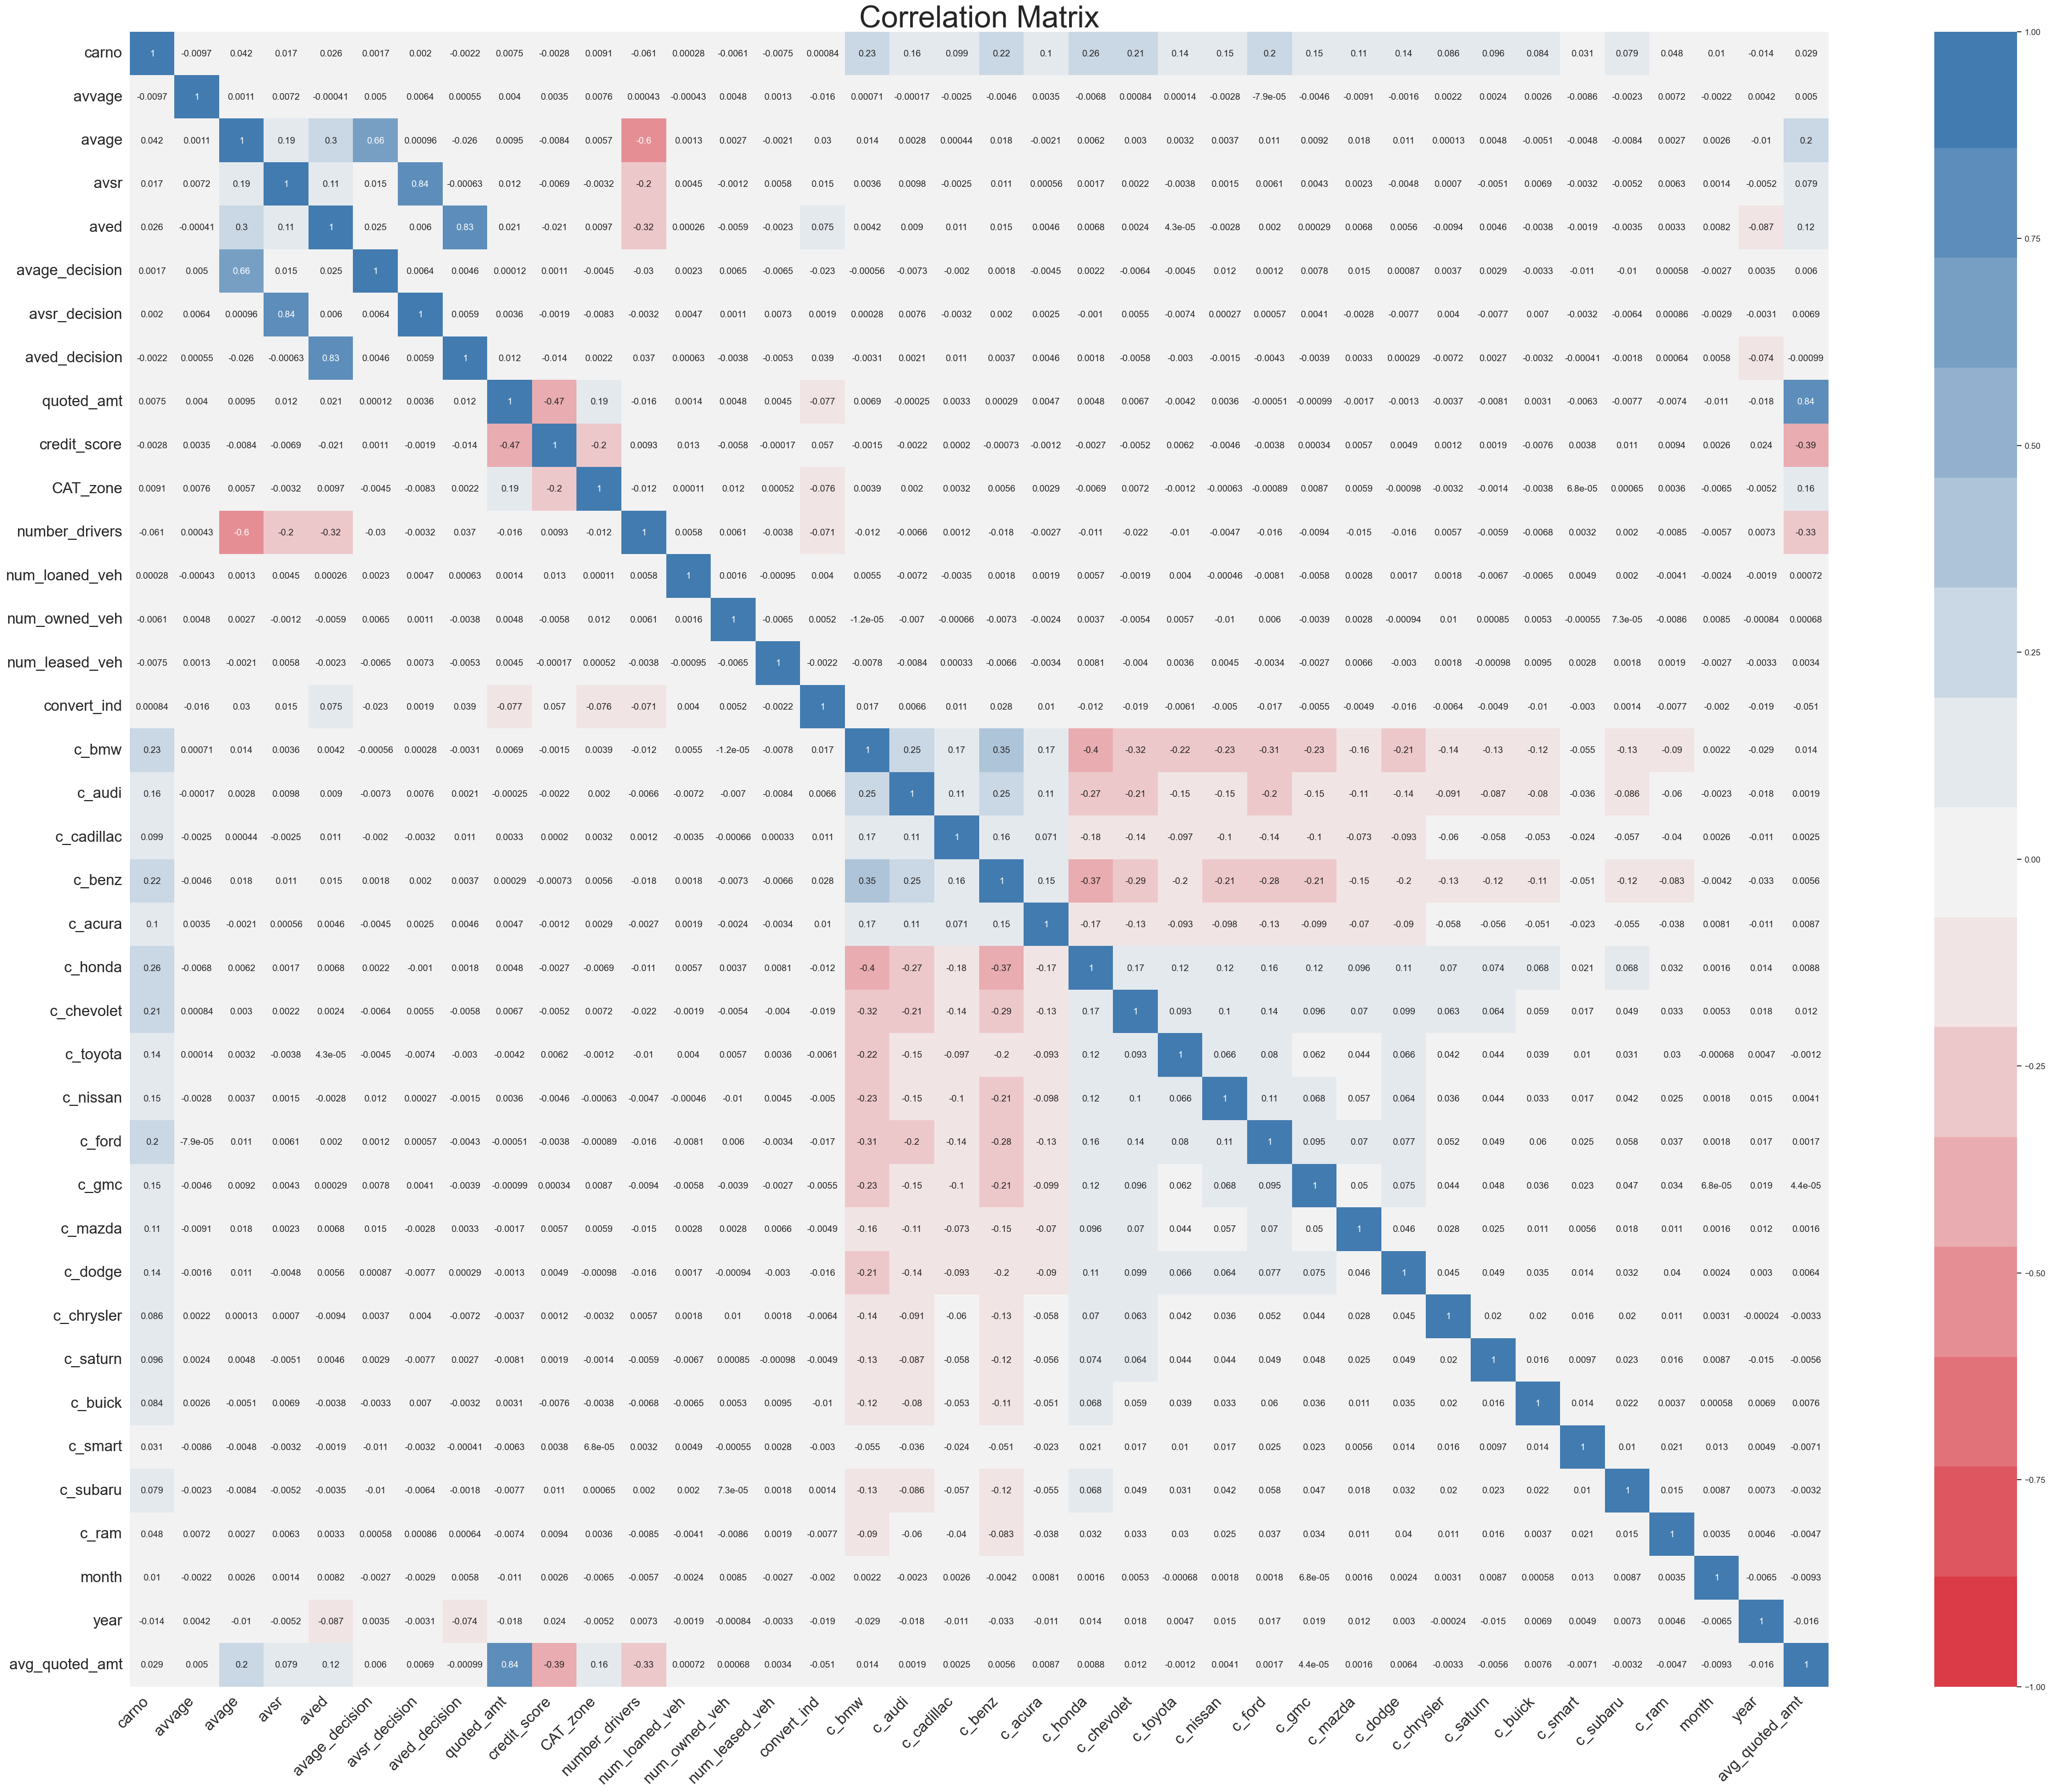

In [14]:
# correlation matrix
from matplotlib.pyplot import figure

corr_matrix = dfTrain.corr()
display(corr_matrix)
figure(figsize=(50, 40), dpi=100)
corr_matrix_visual = sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10, 245, sep=20, n=15))
corr_matrix_visual.set_title('Correlation Matrix', fontsize = 40)
corr_matrix_visual.set_xticklabels(corr_matrix_visual.get_xticklabels(), rotation=45, fontsize = 20, ha='right')
corr_matrix_visual.set_yticklabels(corr_matrix_visual.get_yticklabels(), rotation=0, fontsize = 20)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
further_drop = ['split','policy_id','quoted_amt','avage_decision','avsr_decision','aved_decision']
features_select2 = [i for i in features_select if (i in further_drop) == False]
y_feature = ['convert_ind']
X_feature = [i for i in features_select2 if (((i in y_feature) == False))]+['avg_quoted_amt']
X = dfTrain[X_feature]
y = dfTrain[y_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,random_state=42)

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34498 entries, 0 to 46824
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carno             34498 non-null  int64  
 1   avvage            34498 non-null  float64
 2   avage             34498 non-null  float64
 3   avsr              34498 non-null  float64
 4   aved              34498 non-null  float64
 5   discount          34498 non-null  object 
 6   Home_policy_ind   34498 non-null  object 
 7   state_id          34498 non-null  object 
 8   county_name       34498 non-null  object 
 9   credit_score      34498 non-null  int64  
 10  Cov_package_type  34498 non-null  object 
 11  CAT_zone          34498 non-null  int64  
 12  number_drivers    34498 non-null  int64  
 13  num_loaned_veh    34498 non-null  int64  
 14  num_owned_veh     34498 non-null  int64  
 15  num_leased_veh    34498 non-null  int64  
 16  primary_parking   34498 non-null  object

In [41]:
# catboost without oversample (cross validation)
from warnings import simplefilter
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import cross_val_score
simplefilter("ignore", UserWarning)
simplefilter("ignore", category=FitFailedWarning)
from catboost import CatBoostClassifier
cat_features = [5,6,7,8,10,16,36,37]
from sklearn.model_selection import GridSearchCV, KFold
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

iterations=range(49,55)
learning_rate=[0.26,0.28,0.30,0.32]
depth=range(2,10)
parameters = dict(iterations = iterations, learning_rate = learning_rate,depth=depth)

gs_cat = GridSearchCV(estimator=CatBoostClassifier(cat_features=cat_features,verbose=False),
                      param_grid=parameters, cv=inner_cv, n_jobs=-1, scoring='roc_auc')

train_data = X_train
train_labels = y_train.values
gs_cat = gs_cat.fit(train_data,train_labels)

print(" Parameter Tuning")
print("cross-validate auc: %.4f" % gs_cat.best_score_)
print("Optimal Parameter: ", gs_cat.best_params_)
print("Optimal Estimator: ", gs_cat.best_estimator_)

KeyboardInterrupt: 

In [ ]:
gs_cat = GridSearchCV(estimator=CatBoostClassifier(cat_features=cat_features,verbose=False),
                      param_grid=parameters, cv=inner_cv, n_jobs=-1, scoring='roc_auc')

train_data = X_train
train_labels = y_train.values
gs_cat = gs_cat.fit(train_data,train_labels)

print(" Parameter Tuning")
print("cross-validate auc: %.4f" % gs_cat.best_score_)
print("Optimal Parameter: ", gs_cat.best_params_)
print("Optimal Estimator: ", gs_cat.best_estimator_)

iteritems is deprecated and will be removed in a future version. Use .items instead.


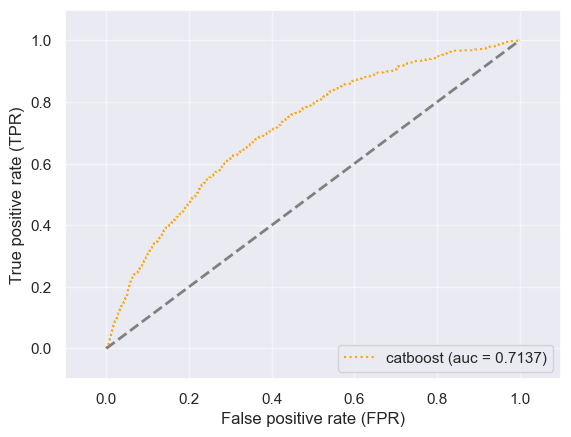

In [42]:
# without oversample
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# catboost without oversample (cross validation)
from warnings import simplefilter
from sklearn.exceptions import FitFailedWarning
from sklearn.model_selection import cross_val_score
simplefilter("ignore", UserWarning)
simplefilter("ignore", category=FitFailedWarning)
from catboost import CatBoostClassifier
cat_features = [5,6,7,8,10,16,36,37]
from sklearn.model_selection import GridSearchCV, KFold
cat_features = [5,6,7,8,10,16,36,37]
clf_cat = CatBoostClassifier(iterations=50,
                             learning_rate=0.3,
                             depth=5,
                             cat_features=cat_features,
                             verbose=False)
clf_labels = ['catboost']
all_clf = [clf_cat]

colors = ['orange']
linestyles = [':','-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]    
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.4f)' % (label, roc_auc))

plt.legend(loc='lower right')    # where to place the legend
plt.plot([0, 1], [0, 1],         # visualize random classifier
         linestyle='--',         # aesthetic parameters
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()


In [34]:
import shap

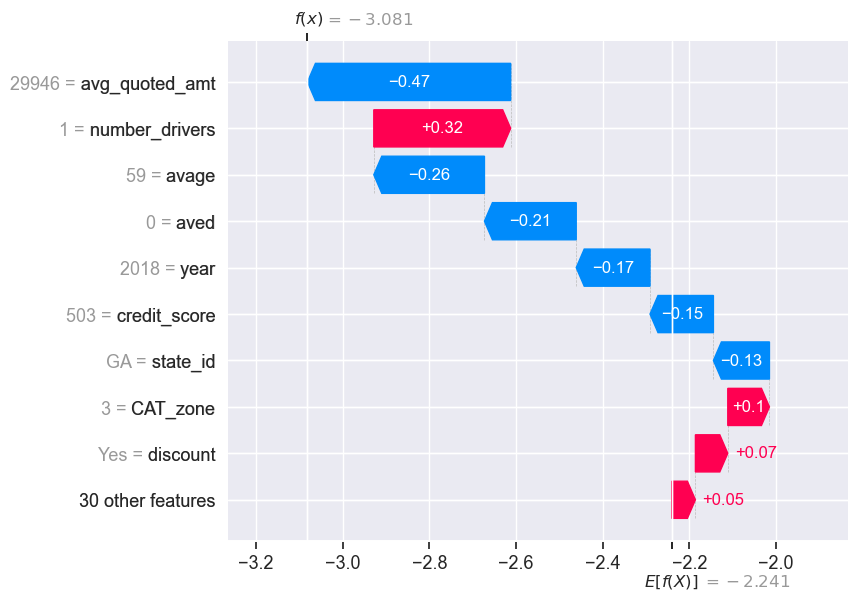

In [35]:
explainer = shap.Explainer(clf_cat)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])

In [89]:
test.isnull().sum()

carno               0
avvage              0
avage               0
avsr                0
aved                0
discount            0
Home_policy_ind     0
state_id            0
county_name         0
credit_score        0
Cov_package_type    0
CAT_zone            0
number_drivers      0
num_loaned_veh      0
num_owned_veh       0
num_leased_veh      0
primary_parking     0
c_bmw               0
c_audi              0
c_cadillac          0
c_benz              0
c_acura             0
c_honda             0
c_chevolet          0
c_toyota            0
c_nissan            0
c_ford              0
c_gmc               0
c_mazda             0
c_dodge             0
c_chrysler          0
c_saturn            0
c_buick             0
c_smart             0
c_subaru            0
c_ram               0
month               0
year                0
avg_quoted_amt      0
dtype: int64

In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11685 entries, 7 to 46827
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carno             11685 non-null  int64  
 1   avvage            11685 non-null  float64
 2   avage             11685 non-null  float64
 3   avsr              11685 non-null  float64
 4   aved              11685 non-null  float64
 5   discount          11685 non-null  object 
 6   Home_policy_ind   11685 non-null  object 
 7   state_id          11685 non-null  object 
 8   county_name       11685 non-null  object 
 9   credit_score      11685 non-null  int64  
 10  Cov_package_type  11513 non-null  float64
 11  CAT_zone          11685 non-null  int64  
 12  number_drivers    11685 non-null  int64  
 13  num_loaned_veh    11685 non-null  int64  
 14  num_owned_veh     11685 non-null  int64  
 15  num_leased_veh    11685 non-null  int64  
 16  primary_parking   11685 non-null  object

In [48]:
test=dfTest.copy()

In [50]:
test=test.drop('convert_ind', axis=1)

In [56]:
#test['quoted_amt'] = test['quoted_amt'].str.replace(",","").str.replace("$","").astype(float)
test['avg_quoted_amt'] = test['quoted_amt']/test['number_drivers']

In [58]:
test = test[X_feature]

In [83]:
test.Cov_package_type

7        1.0
24       2.0
25       0.0
27       1.0
28       2.0
        ... 
46816    1.0
46822    0.0
46825    1.0
46826    0.0
46827    0.0
Name: Cov_package_type, Length: 11685, dtype: float64

In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [60]:
imp_mean = IterativeImputer(random_state=42,n_nearest_features=5)

In [82]:
test.Cov_package_type=test.Cov_package_type.map(dict(Low=0, Medium=1, High=2))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
num_features = np.where(test.dtypes != np.object)[0]

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [86]:
test_new = test.iloc[:,num_features]

In [87]:
imp_mean.fit(test_new)
test.iloc[:,num_features]=imp_mean.transform(test_new)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [90]:
test.Cov_package_type=round(test.Cov_package_type)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [100]:
test.Cov_package_type=test.Cov_package_type.map({0:'Low', 1:'Medium', 2:'High'})


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
